In [3]:
import bisect
import sys
from test_functions import test_functions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
rec = 100000
sys.setrecursionlimit(rec)

In [4]:
def func_2(x_1, x_2):
    return 100 * (x_2 - x_1 ** 2) ** 2 + 5 * (1 - x_1) ** 2

def func_2_grad(x_1, x_2):
    return np.array((10 * (40 * x_1 ** 3 - 40 * x_1 * x_2 + x_1 - 1), 200 * (x_2 - x_1 ** 2)))

In [7]:
def grad(f, fgrad, d, gamma, H, it, xs, ys ,case, counter):
    counter += 1

    if case == 1:
        temp_scalar = (d - H @ gamma) @ gamma
        if temp_scalar < 10 ** (-2):
            H_next = np.eye(2) / 1000
        else:
            H_next = H + (1 / temp_scalar) * np.outer((d - H @ gamma), np.transpose(d - H @ gamma))
        next_it = it - H_next @ fgrad(it[0], it[1])
        d_next = next_it - it
        gamma_next = fgrad(next_it[0], next_it[1]) - fgrad(it[0], it[1])

    elif case == 2:
        temp_1 = (1 / (gamma @ d)) * (np.outer(np.transpose(d), d))
        temp_2 = (1 / ((H @ gamma) @ gamma)) * (np.outer((H @ gamma), np.transpose(H @ gamma)))
        H_next = H + temp_1 - temp_2
        next_it = it - H_next @ fgrad(it[0], it[1])
        d_next = next_it - it
        gamma_next = fgrad(next_it[0], next_it[1]) - fgrad(it[0], it[1])

    else:
        temp_1 = 1 / ((H @ gamma) @ gamma)
        temp_2 = np.outer(H @ gamma, np.transpose(d))
        temp_3 = np.outer(d, np.transpose(H @ gamma))
        temp_4 = 1 +((gamma @ d) / ((H @ gamma) @ gamma))
        temp_5 = np.outer((H @ gamma), np.transpose(H @ gamma))
        H_next = H + temp_1 * (temp_2 + temp_3) - temp_1 * temp_4 * temp_5
        next_it = it - H_next @ fgrad(it[0], it[1])
        d_next = next_it - it
        gamma_next = fgrad(next_it[0], next_it[1]) - fgrad(it[0], it[1])

    xs.append(next_it[0]), ys.append(next_it[1])
    if abs(f(next_it[0], next_it[1]) - f(it[0], it[1])) < 10 ** (-10):
        return next_it, f(next_it[0], next_it[1]), counter

    return grad(f, fgrad, d_next, gamma_next, H_next, next_it, xs, ys, case, counter)


(array([0.99992949, 0.99985757]), 2.5057003503702824e-08, 4209)


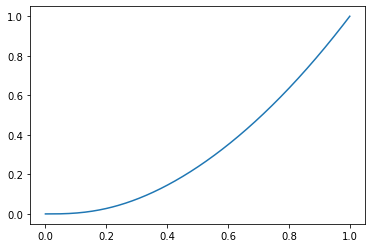

(array([0.99999999, 0.99999997]), 1.089856551396291e-15, 75)


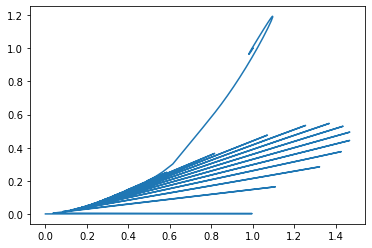

(array([1., 1.]), 4.1636640254079166e-19, 113)


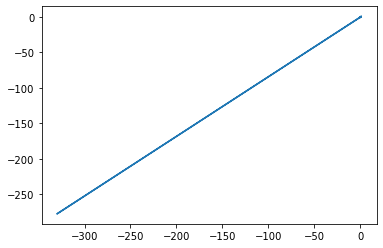

In [8]:
start = np.array((0, 0))
for case in [1, 2, 3]:
    counter = 0
    x_s = [start[0]]
    y_s = [start[1]]
    H_0 = np.eye(2) / 1000
    it_1 = start - H_0 @ func_2_grad(start[0], start[1])
    d = it_1 - start
    grad_it_1 = func_2_grad(it_1[0], it_1[1])
    gamma = grad_it_1 - func_2_grad(start[0], start[1])
    result = grad(func_2, func_2_grad, d, gamma, H_0, it_1,x_s, y_s, case, counter)
    print(result)
    plt.plot(x_s, y_s)
    plt.show()